In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [11]:
data = pd.read_csv('finalData.csv', sep='\t', index_col=0)

In [18]:
from sklearn.metrics import confusion_matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    acc = np.diag(cm).sum() / float(cm.sum())
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('{},Acc={}'.format(title, acc))
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, np.round(cm[i, j],3),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
X = data.drop(['Y'], axis=1)
Y = data['Y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=99)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=88)

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(mutual_info_classif, k=100)
selector.fit(X_train, Y_train)

SelectKBest(k=100, score_func=<function mutual_info_classif at 0x1a1daf32f0>)

In [14]:
X_train = selector.transform(X_train)
X_val = selector.transform(X_val)

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

/Users/JaneYY/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


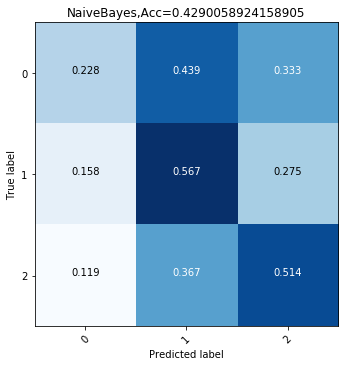

In [19]:
model_nb = GaussianNB()
model_nb.fit(X_train,Y_train)
preds_nb = model_nb.predict(X_val)

np.set_printoptions(precision=3)
plt.figure(figsize = (5,5))
plot_confusion_matrix(confusion_matrix(Y_val, preds_nb, labels=range(3)), classes=range(3), normalize=True,
                      title='NaiveBayes')
plt.show()

## Lasso

In [32]:
lasso90 = data[['Y','host_response_time', 'host_is_superhost', 'host_identity_verified', 'is_location_exact', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'extra_people', 'minimum_nights', 'calendar_updated', 'availability_30', 'instant_bookable', 'require_guest_phone_verification', 'calculated_host_listings_count', 'has_notes', 'has_access', 'has_interaction', 'has_house_rules', 'host_location_if_local', 'host_verifications_facebook', 'host_verifications_jumio', 'host_verifications_kba', 'host_verifications_email', 'host_verifications_work_email', 'host_verifications_phone', 'host_verifications_reviews', 'amenities_Carbon_monoxide_detector', 'amenities_Pets_allowed', 'amenities_Hair_dryer', 'amenities_Host_greets_you', 'amenities_Children’s_books_and_toys', 'amenities_Dryer', 'amenities_Long_term_stays_allowed', 'amenities_Dog(s)', 'amenities_Cleaning_before_checkout', 'amenities_Family/kid_friendly', 'amenities_Bathtub', 'amenities_Shampoo', 'amenities_Microwave', 'amenities_Smoke_detector', 'amenities_TV', 'amenities_Lock_on_bedroom_door', 'amenities_Patio_or_balcony', 'amenities_Wifi', 'amenities_Self_check-in', 'amenities_Private_living_room', 'amenities_Breakfast', 'amenities_Elevator', 'amenities_Fire_extinguisher', 'amenities_Luggage_dropoff_allowed', 'amenities_Gym', 'amenities_First_aid_kit', 'amenities_Pool', 'amenities_Suitable_for_events', 'amenities_Pocket_wifi', 'amenities_24-hour_check-in', 'amenities_Air_conditioning', 'amenities_Pets_live_on_this_property', 'amenities_Dishwasher', 'amenities_Wide_doorway', 'amenities_Essentials', 'amenities_Internet', 'amenities_Refrigerator', 'amenities_Free_street_parking', 'amenities_Free_parking_on_premises', 'amenities_Indoor_fireplace', 'amenities_Other', 'amenities_Paid_parking_off_premises', 'amenities_Hangers', 'amenities_Oven', 'amenities_Paid_parking_on_premises', 'amenities_Heating', 'amenities_Smart_lock', 'amenities_Handheld_shower_head', 'amenities_Buzzer/wireless_intercom', 'amenities_Private_entrance', 'amenities_Iron', 'amenities_Pack_’n_Play/travel_crib', 'amenities_Washer', 'amenities_Extra_pillows_and_blankets', 'amenities_Laptop_friendly_workspace', 'amenities_Safety_card', 'amenities_Smoking_allowed', 'amenities_Ethernet_connection', 'amenities_Doorman', 'amenities_Hot_tub', 'amenities_translation_missing:_en.hosting_amenity_50']]

In [33]:
lasso90

,Y,host_response_time,host_is_superhost,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,...,amenities_Pack_’n_Play/travel_crib,amenities_Washer,amenities_Extra_pillows_and_blankets,amenities_Laptop_friendly_workspace,amenities_Safety_card,amenities_Smoking_allowed,amenities_Ethernet_connection,amenities_Doorman,amenities_Hot_tub,amenities_translation_missing:_en.hosting_amenity_50
0,1,0.0,0.0,1.0,1,0.009924,-0.314036,-0.242912,0.311647,-0.546191,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2.0,0.0,1.0,0,-0.508556,-0.314036,-1.556803,-0.558879,0.690079,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1,0.0,0.0,1.0,1,0.009924,-0.314036,-0.242912,1.182172,-0.166508,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,2.0,0.0,1.0,1,-1.027036,-0.314036,-0.242912,-0.558879,-0.264971,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2,2.0,0.0,0.0,0,-0.508556,-0.314036,-0.242912,-0.558879,0.509293,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,2,0.0,0.0,0.0,0,-0.508556,-0.314036,-0.242912,-0.558879,-0.530668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,0.0,1.0,1.0,1,-0.508556,-0.314036,-0.242912,-0.558879,0.176302,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10,2,2.0,0.0,0.0,1,-0.508556,-0.314036,-0.242912,-0.558879,-0.276588,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,0,0.0,0.0,1.0,1,-1.027036,-0.314036,-0.242912,-0.558879,-0.276588,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
12,2,0.0,0.0,1.0,1,0.528404,-0.314036,-0.242912,0.311647,0.154570,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
X = lasso90.drop(['Y'], axis=1)
Y = lasso90['Y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=99)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=88)

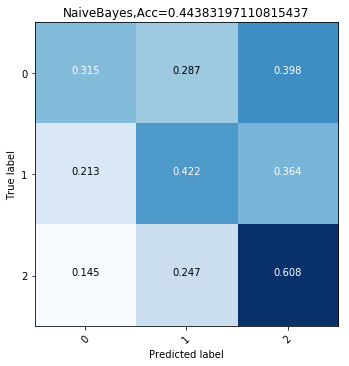

In [35]:
model_nb = GaussianNB()
model_nb.fit(X_train,Y_train)
preds_nb = model_nb.predict(X_val)

np.set_printoptions(precision=3)
plt.figure(figsize = (5,5))
plot_confusion_matrix(confusion_matrix(Y_val, preds_nb, labels=range(3)), classes=range(3), normalize=True,
                      title='NaiveBayes')
plt.show()

## Low Variance

In [20]:
X = data.drop(['Y'], axis=1)
Y = data['Y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=99)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=88)

In [21]:
from sklearn.feature_selection import VarianceThreshold
def variance_threshold_selector(data, threshold=0.16):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]


In [22]:
lowv = data[list(variance_threshold_selector(X_train, 0.1).columns.values)]
X = lowv
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=99)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=88)


In [57]:
lowv

,host_response_time,host_is_superhost,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,...,amenities_Hot_water,amenities_Cable_TV,amenities_Buzzer/wireless_intercom,amenities_Private_entrance,amenities_Iron,amenities_Washer,amenities_Extra_pillows_and_blankets,amenities_Laptop_friendly_workspace,amenities_Safety_card,amenities_translation_missing:_en.hosting_amenity_50
0,0.0,0.0,1.0,1,0.009924,-0.314036,-0.242912,0.311647,-0.546191,-0.910191,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2.0,0.0,1.0,0,-0.508556,-0.314036,-1.556803,-0.558879,0.690079,1.114786,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
5,0.0,0.0,1.0,1,0.009924,-0.314036,-0.242912,1.182172,-0.166508,1.136354,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,2.0,0.0,1.0,1,-1.027036,-0.314036,-0.242912,-0.558879,-0.264971,1.039036,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,2.0,0.0,0.0,0,-0.508556,-0.314036,-0.242912,-0.558879,0.509293,1.105465,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
8,0.0,0.0,0.0,0,-0.508556,-0.314036,-0.242912,-0.558879,-0.530668,-0.910191,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,1.0,1,-0.508556,-0.314036,-0.242912,-0.558879,0.176302,1.080948,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
10,2.0,0.0,0.0,1,-0.508556,-0.314036,-0.242912,-0.558879,-0.276588,-0.910191,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
11,0.0,0.0,1.0,1,-1.027036,-0.314036,-0.242912,-0.558879,-0.276588,-0.910191,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
12,0.0,0.0,1.0,1,0.528404,-0.314036,-0.242912,0.311647,0.154570,-0.910191,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


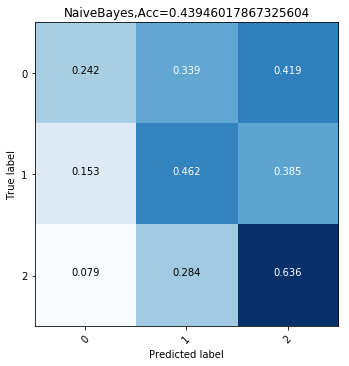

In [23]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train,Y_train)
preds_nb = model_nb.predict(X_val)

np.set_printoptions(precision=3)
plt.figure(figsize = (5,5))
plot_confusion_matrix(confusion_matrix(Y_val, preds_nb, labels=range(3)), classes=range(3), normalize=True,
                      title='NaiveBayes')
plt.show()

## Tree

In [37]:
X = data.drop(['Y'], axis=1)
Y = data['Y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=99)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=88)

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=30).fit(X_train,Y_train)


def tree_selector(data):
    selector = SelectFromModel(clf, prefit=True)
    selector.transform(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [26]:
tree = data[list(tree_selector(X_train).columns.values)]
X = tree
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=99)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=88)


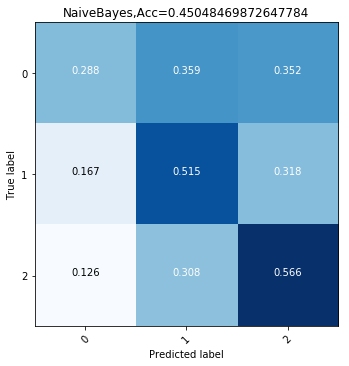

In [27]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train,Y_train)
preds_nb = model_nb.predict(X_val)

np.set_printoptions(precision=3)
plt.figure(figsize = (5,5))
plot_confusion_matrix(confusion_matrix(Y_val, preds_nb, labels=range(3)), classes=range(3), normalize=True,
                      title='NaiveBayes')
plt.show()

## PCA

In [44]:
from sklearn.decomposition import PCA
X = data.drop(['Y'], axis=1)
Y = data['Y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=99)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=88)

pca = PCA(n_components=60)
pca.fit(X_train)
print(pca.explained_variance_ratio_) 

[0.133 0.069 0.053 0.046 0.041 0.037 0.034 0.033 0.031 0.029 0.028 0.025
 0.025 0.02  0.018 0.017 0.016 0.014 0.013 0.011 0.011 0.01  0.01  0.009
 0.008 0.008 0.008 0.007 0.007 0.007 0.006 0.006 0.006 0.006 0.006 0.006
 0.006 0.006 0.006 0.005 0.005 0.005 0.005 0.005 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.003 0.003 0.003 0.003 0.003 0.003 0.003]


In [45]:
sum(pca.explained_variance_ratio_)

0.9145365111544722

In [30]:
X_train = pca.transform(X_train)
X_val = pca.transform(X_val)

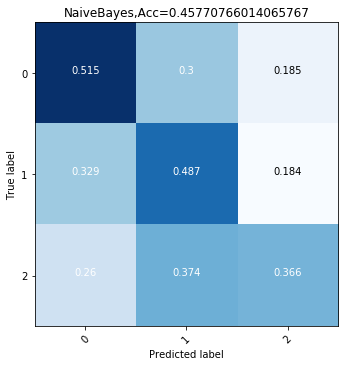

In [31]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train,Y_train)
preds_nb = model_nb.predict(X_val)

np.set_printoptions(precision=3)
plt.figure(figsize = (5,5))
plot_confusion_matrix(confusion_matrix(Y_val, preds_nb, labels=range(3)), classes=range(3), normalize=True,
                      title='NaiveBayes')
plt.show()

In [42]:
tree_file = data[list(tree_selector(X_train).columns.values)]
tree_file['Y'] = data.Y
tree_file.to_csv('tree_file.csv', sep='\t')

/Users/JaneYY/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
tree_file

,host_response_time,host_is_superhost,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,...,amenities_Cable_TV,amenities_Buzzer/wireless_intercom,amenities_Private_entrance,amenities_Iron,amenities_Washer,amenities_Extra_pillows_and_blankets,amenities_Laptop_friendly_workspace,amenities_Safety_card,amenities_translation_missing:_en.hosting_amenity_50,Y
0,0.0,0.0,1.0,1,0.009924,-0.314036,-0.242912,0.311647,-0.546191,-0.910191,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,2.0,0.0,1.0,0,-0.508556,-0.314036,-1.556803,-0.558879,0.690079,1.114786,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1
5,0.0,0.0,1.0,1,0.009924,-0.314036,-0.242912,1.182172,-0.166508,1.136354,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
6,2.0,0.0,1.0,1,-1.027036,-0.314036,-0.242912,-0.558879,-0.264971,1.039036,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
7,2.0,0.0,0.0,0,-0.508556,-0.314036,-0.242912,-0.558879,0.509293,1.105465,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2
8,0.0,0.0,0.0,0,-0.508556,-0.314036,-0.242912,-0.558879,-0.530668,-0.910191,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,0.0,1.0,1.0,1,-0.508556,-0.314036,-0.242912,-0.558879,0.176302,1.080948,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1
10,2.0,0.0,0.0,1,-0.508556,-0.314036,-0.242912,-0.558879,-0.276588,-0.910191,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2
11,0.0,0.0,1.0,1,-1.027036,-0.314036,-0.242912,-0.558879,-0.276588,-0.910191,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
12,0.0,0.0,1.0,1,0.528404,-0.314036,-0.242912,0.311647,0.154570,-0.910191,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2


In [47]:
pca_file = pca.transform(X)

In [51]:
pca_file = pd.DataFrame(pca_file, index=data.index)

In [53]:
pca_file['Y'] = data.Y

In [55]:
pca_file.to_csv('pca_file.csv', sep='\t')